In [2]:
%pip install matplotlib


[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: pip3.11 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
import matplotlib.pyplot as plt
import sys
import time 

def min_coins(coins, m, V):
    if (V == 0):
        return 0

    res = sys.maxsize
    for i in range(0, m):
        if (coins[i] <= V):
            sub_res = min_coins(coins, m, V-coins[i])

            if (sub_res != sys.maxsize and sub_res + 1 < res):
                res = sub_res + 1
    return res


def min_coins_top_down(coins, m, V, dp):
    if V == 0:
        return 0
    if dp[V] != -1:
        return dp[V]

    res = sys.maxsize

    for i in range(m):
        if coins[i] <= V:
            sub_res = min_coins_top_down(coins, m, V - coins[i], dp)

            if sub_res != sys.maxsize and sub_res + 1 < res:
                res = sub_res + 1
    dp[V] = res
    return res


def solve_min_coins_top_down(coins, m, V):
    dp = [-1] * (V + 1)
    return min_coins_top_down(coins, m, V, dp)


def min_coins_bottom_up(coins, m, V):
    table = [0 for i in range(V + 1)]
    table[0] = 0
    for i in range(1, V + 1):
        table[i] = sys.maxsize
    for i in range(1, V + 1):         
        for j in range(m):
            if (coins[j] <= i):
                sub_res = table[i - coins[j]]
                if (sub_res != sys.maxsize and
                    sub_res + 1 < table[i]):
                    table[i] = sub_res + 1

    if table[V] == sys.maxsize:
        return -1

    return table[V]


def get_time(function, coins, m, value):
    start = time.time()
    if function == 1:
        min_coins(coins, m, value)
    elif function == 2:
        solve_min_coins_top_down(coins, m, value)
    else:
        min_coins_bottom_up(coins, m, value)

    end = time.time()
    elapsed_time = end - start
    print(elapsed_time)
    return elapsed_time


In [6]:
coins = [9, 6, 5, 1]
m = len(coins)

valores = [15, 25, 35, 45, 55]

y_base = [
    get_time(1, coins, m, 15), 
    get_time(1, coins, m, 25), 
    get_time(1, coins, m, 35), 
    get_time(1, coins, m, 45), 
    get_time(1, coins, m, 55)
]

y_top_down = [
    get_time(2, coins, m, 15), 
    get_time(2, coins, m, 25), 
    get_time(2, coins, m, 35), 
    get_time(2, coins, m, 45), 
    get_time(2, coins, m, 55)
]  

y_bottom_up = [
    get_time(3, coins, m, 15), 
    get_time(3, coins, m, 25), 
    get_time(3, coins, m, 35), 
    get_time(3, coins, m, 45), 
    get_time(3, coins, m, 55)
] 

0.00016427040100097656
0.005410909652709961
0.14035296440124512
5.409840822219849
218.10979676246643
5.602836608886719e-05
3.218650817871094e-05
2.9087066650390625e-05
4.1961669921875e-05
4.410743713378906e-05
1.7881393432617188e-05
1.811981201171875e-05
2.8133392333984375e-05
3.0279159545898438e-05
4.029273986816406e-05


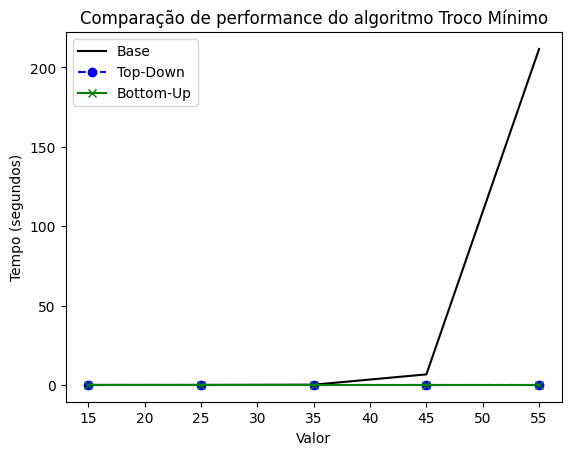

In [5]:
plt.plot(valores, y_base, label='Base', linestyle='-', color='black')
plt.plot(valores, y_top_down, label='Top-Down', marker='o', linestyle='--', color='blue')
plt.plot(valores, y_bottom_up, label='Bottom-Up', marker='x', linestyle='-', color='green')

plt.xlabel('Valor')
plt.ylabel('Tempo (segundos)')
plt.title('Comparação de performance do algoritmo Troco Mínimo')

plt.legend()

# Exibir o gráfico
plt.show()
